![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

import random

**Import data**

In [0]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
online_retail = pd.read_csv('https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv', encoding ='latin1')

In [4]:
# Print out First 5 rows from dataframe
# Your code here
# Get first 5 rows with head
online_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
# Print out brief info
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [6]:
# Your code here
# Count is NaN with function isna and sum is count value is True
online_retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [7]:
# List all NaN values
# Create a new df with CustomerID is NaN
online_retail_nan = online_retail[online_retail['CustomerID'].isna()]
online_retail_nan.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom


**Exclude negative Quatity entries**

In [0]:
# Exclude negative Quantity entries with Quantity value >= 0
online_retail = online_retail[online_retail['Quantity'] >= 0]

**Exclude negative Price entries**

In [0]:
# Exclude negative Price entries with UnitPrice value >= 0
online_retail = online_retail[online_retail['UnitPrice'] >= 0]

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [11]:
# Create new df with Country = 'United Kingdom'
online_retail_uk = online_retail[online_retail['Country'] == 'United Kingdom']

# Group by InvoiceNo
invoice_no_uk_unique = online_retail_uk.groupby('InvoiceNo').mean()
# Count CustomerID with number of orders and get first row is Customer with the highest number of orders
invoice_no_uk_unique.CustomerID.value_counts().head(1)

12748.0    210
Name: CustomerID, dtype: int64

**The customer with the highest money spent on purchases comes from Netherlands**

In [0]:
# Get length of df
online_retail_len = len(online_retail)

# Create a new column TotalPay is multiplication between quantity and unit price
total_pay = [online_retail.Quantity.iloc[i] * online_retail.UnitPrice.iloc[i] for i in range (online_retail_len)]
online_retail['TotalPay'] = total_pay

In [13]:
# Create a new df with Country is Netherlands
online_retail_nl = online_retail[online_retail['Country'] == 'Netherlands']

# Group by CustomerId and sum TotalPay, get the first row is the the customer with the highest money spent on purchases comes from Netherlands
online_retail_nl.groupby('CustomerID').sum()['TotalPay'].nlargest(1)

CustomerID
14646.0    280206.02
Name: TotalPay, dtype: float64

**On which year had the highest sales?**

In [14]:
# Use split to get year of orders, create a new column is InvoiceYear
invoice_year = ['20' + online_retail['InvoiceDate'].iloc[i].split(' ')[0].split('/')[2] for i in range (online_retail_len)]
online_retail['InvoiceYear'] = invoice_year

# Group by InvoiceYear with sum TotalPay, get the first row will get the Year had the highest sales
online_retail.groupby('InvoiceYear').sum()['TotalPay'].nlargest(1).reset_index()['InvoiceYear'][0]

'2011'

**How many orders (per hour)?**

In [15]:
# Create a new column InvoiceHour by use slpit value from InvoiceDate
invoice_hour = [int(online_retail['InvoiceDate'].iloc[i].split(' ')[1].split(':')[0]) for i in range (online_retail_len)]
online_retail['InvoiceHour'] = invoice_hour

# Create a new table with two columns are InvoiceNo and InvoiceHour
online_retail_order_hour = online_retail[['InvoiceNo','InvoiceHour']]

# Drop row with duplicate value
online_retail_order_hour = online_retail_order_hour.drop_duplicates()

# Count InvoiceHour and sort hours
order_per_hour = online_retail_order_hour['InvoiceHour'].value_counts().sort_index()
order_per_hour

6        1
7       29
8      568
9     1538
10    2431
11    2473
12    3323
13    2818
14    2555
15    2474
16    1406
17     738
18     209
19     146
20      18
Name: InvoiceHour, dtype: int64

**Make a plot about number of orders per hour**

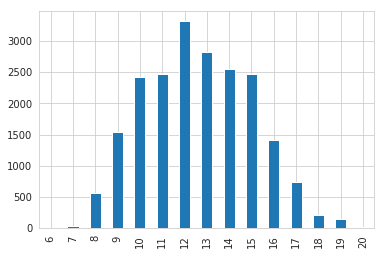

In [16]:
# plot order_per_hour
order_per_hour.plot(kind='bar')

**How many orders (per month)?**

In [0]:
# Create a new column InvoiceMonth by use split value from InvoiceDate
invoice_month = [int(online_retail['InvoiceDate'].iloc[i].split(' ')[0].split('/')[0]) for i in range (online_retail_len)]
online_retail['InvoiceMonth'] = invoice_month

In [18]:
# The df had 2 year 2010 and 2011, so we have data for 2010 and 2011

# Create a new df of year 2010
online_retail_2010 = online_retail[online_retail['InvoiceYear'] == '2010']

# Get two columns InvoiceNo, InvoiceMonth and drop duplicates
online_retail_order_month_2010 = online_retail_2010[['InvoiceNo','InvoiceMonth']]
online_retail_order_month_2010 = online_retail_order_month_2010.drop_duplicates()

# Count order per month and sort index
order_per_month_2010 = online_retail_order_month_2010['InvoiceMonth'].value_counts().sort_index()
order_per_month_2010

12    1629
Name: InvoiceMonth, dtype: int64

In [19]:
# Create a new df of year 2011
online_retail_2011 = online_retail[online_retail['InvoiceYear'] == '2011']

# Get two columns InvoiceNo, InvoiceMonth and drop duplicates
online_retail_order_month_2011 = online_retail_2011[['InvoiceNo','InvoiceMonth']]
online_retail_order_month_2011 = online_retail_order_month_2011.drop_duplicates()

# Count order per month and sort index
order_per_month_2011 = online_retail_order_month_2011['InvoiceMonth'].value_counts().sort_index()
order_per_month_2011

1     1120
2     1126
3     1531
4     1318
5     1731
6     1576
7     1540
8     1407
9     1896
10    2129
11    2884
12     839
Name: InvoiceMonth, dtype: int64

**Make a plot about number of orders per month**

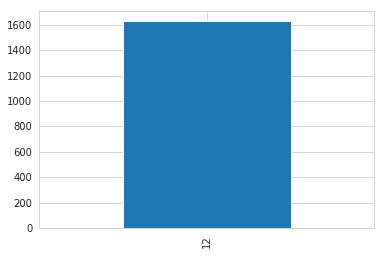

In [20]:
# Use plot order per month of year 2010
order_per_month_2010.plot(kind='bar')

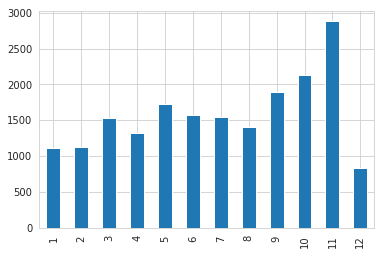

In [21]:
# Use plot order per month of year 2011
order_per_month_2011.plot(kind='bar')

**Top 10 items most sales**

In [22]:
# with a StockCode can have many different Description, so we will group by both StockCode and Description by different df

# Group by Description and sum quantity to get 10 items most sales
online_retail.groupby('Description').sum()['Quantity'].nlargest(10).reset_index()

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3,JUMBO BAG RED RETROSPOT,48478
4,WHITE HANGING HEART T-LIGHT HOLDER,37895
5,POPCORN HOLDER,36761
6,ASSORTED COLOUR BIRD ORNAMENT,36461
7,PACK OF 72 RETROSPOT CAKE CASES,36419
8,RABBIT NIGHT LIGHT,30788
9,MINI PAINT SET VINTAGE,26633


In [23]:
# Group by StockCode and sum quantity to get 10 items most sales
online_retail.groupby('StockCode').sum()['Quantity'].nlargest(10).reset_index()

,StockCode,Quantity
0,23843,80995
1,23166,78033
2,22197,56921
3,84077,55047
4,85099B,48478
5,85123A,41664
6,84879,36461
7,21212,36419
8,23084,31722
9,22492,26633


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [24]:
# Create a new df without Country from United Kingdom
online_retail_without_uk = online_retail[online_retail['Country'] != 'United Kingdom']

# Group by Country and get 10 Country with Quantity largest
online_retail_without_uk_country = online_retail_without_uk.groupby('Country').sum()
online_retail_without_uk_country = online_retail_without_uk_country.reset_index().nlargest(10, "Quantity")

# Get two columns are Country and Quantity
online_retail_without_uk_country = online_retail_without_uk_country[['Country','Quantity']]
online_retail_without_uk_country


# What can you tell about this?

,Country,Quantity
24,Netherlands,200937
10,EIRE,147447
14,Germany,119263
13,France,112104
0,Australia,84209
32,Sweden,36083
33,Switzerland,30630
31,Spain,27951
20,Japan,26016
3,Belgium,23237


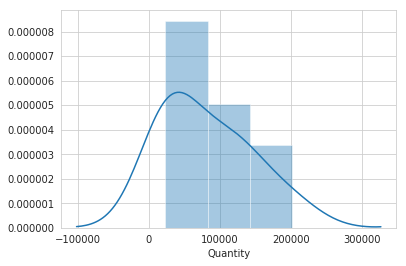

In [26]:
sns.distplot(online_retail_without_uk_country['Quantity'])

I think the histogram has a big difference in the distribution.

### You are awesome!!